# K-Means Clustering & Kernel Trick
## CSCI 4622 - Fall 2021
***
**Name**:Luis R. Corzo
***


Data Setup
---

For this problem set, we will be working with synthetic data in varying arrangements. In particular, we will use a "Blobs" dataset and a "Half-Moons" dataset.

In [1]:
import math
import pickle
import gzip
import numpy as np
import pandas
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
from sklearn import datasets 
np.random.seed(0)

class BlobData:
    def __init__(self, c=4, n=5000):
        xx, yy = datasets.make_blobs(centers=c, n_samples=n)
        self.X = xx
        self.y = yy
        
class MoonData:
    def __init__(self, n=2000):
        xx, yy = datasets.make_moons(n_samples=n, noise=0.05)
        self.X = xx
        self.y = yy
                
blob_data = BlobData()
moon_data = MoonData()


Problem 1 - K-Means (Clustering) [45 Points]
---
K-means clustering is a type of unsupervised learning, which is used in the scenarios where you have unlabeled data. The goal of K-means is to partition the data into $k$ clusters such that the sum of intra-cluster variances is minimal.

We will be using Euclidian distance as our loss measure, so for cluster $C_i = \{x_1,x_2,... x_{m_i}\}$, its intra-cluster variance $V(C_i)$ is defined as:

$$
V(C_i) = \sum_{j=1}^{m_i} ||x_j - \mu_i||^2
$$

where $\mu_i = \frac{1}{m} \sum_{i=1}^{m_i} x_i$. $\mu_i$ is called the centroid of cluster $C_i$.

So for $k$ clusters, K-means objective is:
$$
\sum_{i=1}^{k}V(C_i) = \sum_{i=1}^{k} \sum_{j=1}^{m_i} ||x_j - \mu_i||^2
$$

Each point $x_i$ is assigned to the cluster of the closest centroid. Hence, finding The parition $\{C_1,C_2...C_k\}$ that minimizes the objective is equivalent to finding the optimal centroids. The cluster centroids are computed using the mean of the corresponding clusters ($C_1, ..., C_k$) which is equivalent to taking mean of the data points that lies inside the given cluster. 

#### Complete the KMeans class:
- **1.1 [5 points]** Complete the `cluster_assignment`: Given a single data point (_xi_), it computes the cluster to which it belongs. Calculate distance of the point _xi_ with all the centroids  and returns the index of self.centroid its closest to.
- **1.2 [5 points]** Complete `predict_labels` : Given data _X_ (n_rows  x n_features), returns labels (cluster no.). Use `cluster_assignments` over all _X_ and return cluster assignments corresponding to each _xi_
- **1.3 [5 points]** Complete `centroid_update`: Updates the centroids of each cluster. Compute the mean value of data points in each cluster and update the cluster centroids with the computed values. 
- **1.4 [10 points]** Complete the `fit`: Routine for running K-means. Follow instructions given in function.

In [3]:
class KMeans:
    def __init__(self, n_clusters=4, centroid_init=None):
        """
        Parameters
        ----------
        n_clusters:  number of clusters
        centroid_init: Centroid Initialization (to be used for prediction)
        """             
        self.K = n_clusters
        self.centroids = centroid_init
        
    def cluster_assignment(self, xi):
        """
        Given a random data point (xi), compute the cluster to which it belongs.
        ----------
        xi: a single data point
        
        Returns: 
            ci: cluster assignment (label) of xi
        """
        ##BEGIN
        
        distances = []
        
        for centroid in self.centroids:
            
            x_coord_sq = (xi[0]-centroid[0])**2
            y_coord_sq = (xi[1]-centroid[1])**2
            
            dist = np.sqrt(x_coord_sq + y_coord_sq)
            distances.append(dist)
        
        min_dist = min(distances)
        label = distances.index(min_dist)

        return label
        ##END
    
    def predict_labels(self, X):
        """
        Predict label (cluster assignments) for the dataset.
        ----------
        X: given data (n_rows  x n_features)
        
        Returns: 
            labels: index of closest centroids (n_rows)  
        """
        ##BEGIN
        labels =[]
        for xi in X:
            label = self.cluster_assignment(xi)
            labels.append(label)
    
        return labels
        ##END
    
    def centroid_update(self, X):
        
        """
        Update the centroids (self.centroids) 
        : Compute the mean value of data points in each cluster 
          and update the cluster centroids with them. 
        ----------
        X: given data (n_rows  x n_features)
        
        Returns: nothing
        """
        ##BEGIN
        new_centroids = []
        
        clusters = []
        labels = self.predict_labels(X)
        
        for i in range(0,self.K):
                
                cluster = []
                
                for j in range(0,len(X)):
                    
                    if labels[j] == i:
                        cluster.append(X[j])
                        
                clusters.append(cluster)
                
        
        for clusteri in clusters:
            
            centroid_points_x = []
            centroid_points_y = []
            
            for i in range(0,len(clusteri)):
                
                centroid_points_x.append(clusteri[i][0])
                centroid_points_y.append(clusteri[i][1])
                #print(centroid_points_x)

            new_centroid_x = np.mean(centroid_points_x)
            new_centroid_y = np.mean(centroid_points_y)

            new_centroids.append(list((new_centroid_x, new_centroid_y)))
        
        self.centroids = new_centroids
        ##END
        
    def fit(self, X):
        """
        Run K-means.
        
        : Initialize a list of centroids (length self.K) with random values.   
        : Generate clusters using self.predict labels, using the dataset X.
        : Update the centroids using mean of clusters until they converge, 
          i.e, no change is observed in values of centroids.
        
        ----------
        X: given data (n_rows  x n_features)
        
        Returns: 
            self.centroids: Final values of the estimated centroids (length K)  
        
        """
        ##BEGIN
        init_centroids = []
        
        for i in range(0,self.K):
            g = 2*self.K
            init_centroid = g * np.random.random_sample(2) - self.K
            init_centroids.append(init_centroid)
        
        self.centroids = init_centroids
        
        
        converged=False
        new_labels = []
        
        while converged != True:
            
            #print(self.centroids)
            prev_labels = self.predict_labels(X)
            
            self.centroid_update(X)
                
            new_labels = self.predict_labels(X)
            
            
            if prev_labels == new_labels:
                    converged = True
            
            
            #for centroid in prev_centroids:
                
            #    if centroid == 
        return self.centroids  
        
        ##END

**1.5 a [5 points]** For each of the datasets (`blob_data` & `moon_data`), do the following:
- Produce a scatter plot data-points and color the points according to their labels.
- Observe the number of clusters in each data. Then fit K-means and show the computed centroids on the plot.

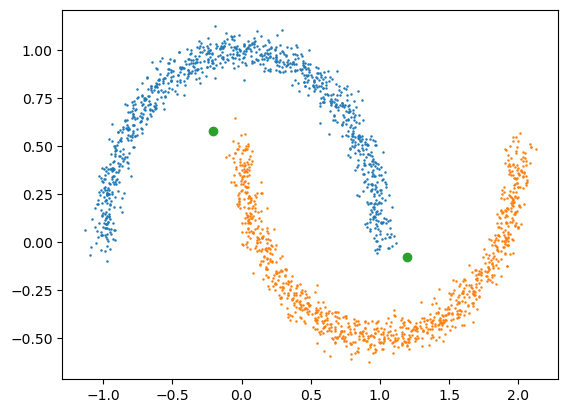

[0.9884461559323046, 4.354611838777428]
[2.0179719700052554, 0.8910861872058378]
[-1.629663519429535, 2.901674078758923]
[-1.3058757152682208, 7.830033879520974]


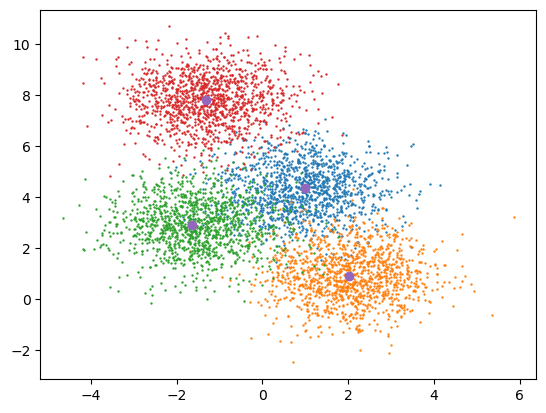

In [6]:
np.random.seed(4622)

##BEGIN
#__Moon dataset:_________________________________________________________________________

points0x = []
points0y = []
points1x = []
points1y = []

for i in range(0,len(moon_data.X)):
    
    if moon_data.y[i] == 0:
        points0x.append(moon_data.X[i,0])
        points0y.append(moon_data.X[i,1])
        
    if moon_data.y[i] == 1:
        points1x.append(moon_data.X[i,0])
        points1y.append(moon_data.X[i,1])
        
        
kmeans_moon = KMeans(2)
centroids = kmeans_moon.fit(moon_data.X)

centroids_x = []
centroids_y = []

for centroid in centroids:
    centroids_x.append(centroid[0])
    centroids_y.append(centroid[1])
        
plt.scatter(points0x, points0y, .6)
plt.scatter(points1x, points1y, .6)
plt.scatter(centroids_x,centroids_y)
plt.show()


#__Blob dataset:_________________________________________________________________________

points0x = []
points0y = []
points1x = []
points1y = []
points2x = []
points2y = []
points3x = []
points3y = []

for i in range(0,len(blob_data.X)):
    
    if blob_data.y[i]==0:
        points0x.append(blob_data.X[i,0])
        points0y.append(blob_data.X[i,1])
        
    elif blob_data.y[i]==1:
        points1x.append(blob_data.X[i,0])
        points1y.append(blob_data.X[i,1])
    
    elif blob_data.y[i]==2:
        points2x.append(blob_data.X[i,0])
        points2y.append(blob_data.X[i,1])

    else:
        points3x.append(blob_data.X[i,0])
        points3y.append(blob_data.X[i,1])
        
kmeans_blob = KMeans(4)
centroids2 = kmeans_blob.fit(blob_data.X)

centroids2_x = []
centroids2_y = []

for centroid in centroids2:
    centroids2_x.append(centroid[0])
    centroids2_y.append(centroid[1])
        
plt.scatter(points0x, points0y,.5)
plt.scatter(points1x, points1y,.5)
plt.scatter(points2x, points2y,.5)
plt.scatter(points3x, points3y,.5)
plt.scatter(centroids2_x, centroids2_y)
plt.show()


**1.5 b [5 points]** For each of the datasets (`blob_data` & `moon_data`), do the following:
- Produce a scatter plot data-points and color the points according to their labels.
- Produce another scatter plot data-points and color the points according to their predicted labels

**NOTE:** The centroids obtained from KMeans `fit` can be used as the argument for `centroid_init` and then you'll be able to predict lables using `predict_labels` of the data-points.

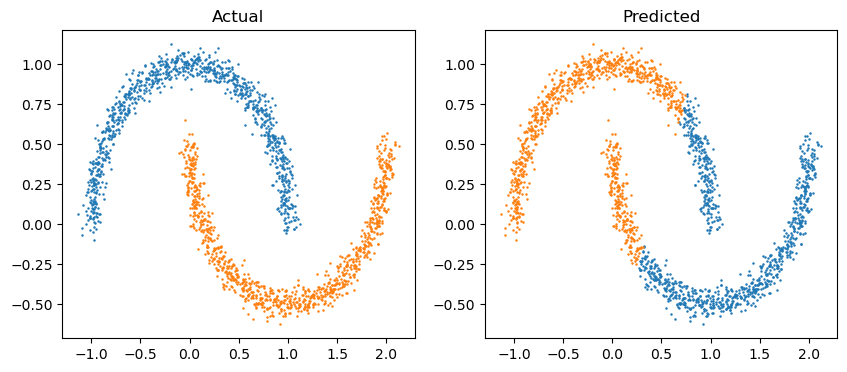

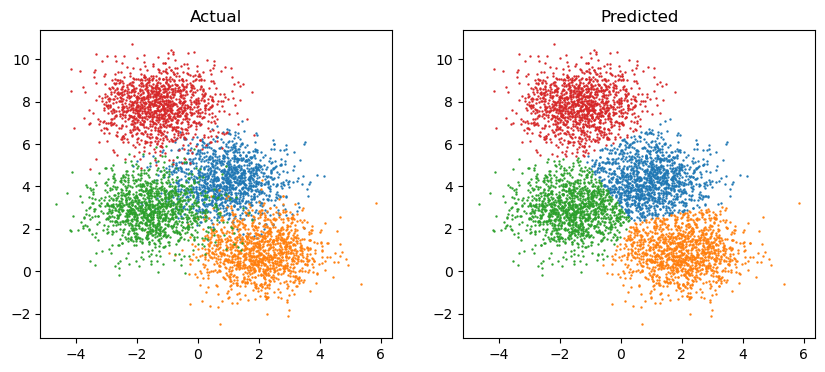

In [12]:
np.random.seed(4622)

##BEGIN
#__Moon dataset:_________________________________________________________________________

points0x = []
points0y = []
points1x = []
points1y = []

for i in range(0,len(moon_data.X)):
    
    if moon_data.y[i] == 0:
        points0x.append(moon_data.X[i,0])
        points0y.append(moon_data.X[i,1])
        
    if moon_data.y[i] == 1:
        points1x.append(moon_data.X[i,0])
        points1y.append(moon_data.X[i,1])
        
        
pred_points0x = []
pred_points0y = []
pred_points1x = []
pred_points1y = []

labels = kmeans_moon.predict_labels(moon_data.X)

for i in range(0,len(moon_data.X)):
    
    if labels[i] == 0:
        pred_points0x.append(moon_data.X[i,0])
        pred_points0y.append(moon_data.X[i,1])
        
    if labels[i] == 1:
        pred_points1x.append(moon_data.X[i,0])
        pred_points1y.append(moon_data.X[i,1])
        

fig, ax = plt.subplots(ncols=2, figsize=(10,4))

ax[0].set_title('Actual')
ax[0].scatter(points0x, points0y, .6)
ax[0].scatter(points1x, points1y, .6)

ax[1].set_title('Predicted')
ax[1].scatter(pred_points0x, pred_points0y, .6)
ax[1].scatter(pred_points1x, pred_points1y, .6)
plt.show()


#__Blob dataset:_________________________________________________________________________

points0x = []
points0y = []
points1x = []
points1y = []
points2x = []
points2y = []
points3x = []
points3y = []

for i in range(0,len(blob_data.X)):
    
    if blob_data.y[i]==0:
        points0x.append(blob_data.X[i,0])
        points0y.append(blob_data.X[i,1])
        
    elif blob_data.y[i]==1:
        points1x.append(blob_data.X[i,0])
        points1y.append(blob_data.X[i,1])
    
    elif blob_data.y[i]==2:
        points2x.append(blob_data.X[i,0])
        points2y.append(blob_data.X[i,1])

    else:
        points3x.append(blob_data.X[i,0])
        points3y.append(blob_data.X[i,1])
        

pred_points0x = []
pred_points0y = []
pred_points1x = []
pred_points1y = []
pred_points2x = []
pred_points2y = []
pred_points3x = []
pred_points3y = []

labels2 = kmeans_blob.predict_labels(blob_data.X)

for i in range(0,len(blob_data.X)):
    
    if labels2[i]==0:
        pred_points0x.append(blob_data.X[i,0])
        pred_points0y.append(blob_data.X[i,1])
        
    elif labels2[i]==1:
        pred_points1x.append(blob_data.X[i,0])
        pred_points1y.append(blob_data.X[i,1])
    
    elif labels2[i]==2:
        pred_points2x.append(blob_data.X[i,0])
        pred_points2y.append(blob_data.X[i,1])

    else:
        pred_points3x.append(blob_data.X[i,0])
        pred_points3y.append(blob_data.X[i,1])
        

fig, ax2 = plt.subplots(ncols=2, figsize=(10,4))

ax2[0].set_title('Actual')
ax2[0].scatter(points0x, points0y,.5)
ax2[0].scatter(points1x, points1y,.5)
ax2[0].scatter(points2x, points2y,.5)
ax2[0].scatter(points3x, points3y,.5)

ax2[1].set_title('Predicted')
ax2[1].scatter(pred_points0x, pred_points0y,.5)
ax2[1].scatter(pred_points1x, pred_points1y,.5)
ax2[1].scatter(pred_points2x, pred_points2y,.5)
ax2[1].scatter(pred_points3x, pred_points3y,.5)

plt.show()

##END

.

- **1.6 [5 points]** Comment on the quality of centroids obtained in the above question.

The centroids obtained for the moons dataset were worse than the ones obtained for the blobs dataset. About a third of the points of each class belonging to the moons dataset were misclassified, whereas a very few of the points belonging to the blob dataset were missclassified.


- **1.7 [5 points]** Based on the observation from above, give some disadvantages of KMeans.

The each class of points of the blobs dataset follow a somewhat circular structure, whereas the two classes of the moons datset do not. Given the different structures of the two datasets, it makes sense that the blobs dataset is more appropiate to be paired with K-Means due to the circular structure of each cluster. K-Means bases prediction on mean distances, which is the reason why datasets with circular cluster arrangements are appropiate for using K-Means. 

The previous statements tell us that a disadvantage of K-Means clustering is that, if one tries to employ it on datasets containing non-circular clusters structures, then the predictions made would not be as accurate as on datasets which contain circular clusters arrangements.

A second disadvantage of the same nature in terms of bad accuracy regarding predictions, is that if our dataset is imbalanced (-that is, if our dataset has one or more classes with few datapoints compared to the others), then k-means will place more weight on bigger clusters than smaller ones since K-Means tries to minimize the within-cluster variation. 


Problem 2 - The Kernel Trick [15 Points]
---
A Kernel Trick is a simple method where non-linear data is projected onto a another dimension space so as to make it easier to classify the data where it could be linearly divided by a plane. The kernel trick make methods like support vector machines powerful. In this problem we will get familiar with the kernel trick.

 
_XOR_ is a logic unit that gives a true (1 or HIGH) output when the number of true inputs is odd. 
$$ \begin{array}{c|cccc} x_1 & 1 & 0 & 1 & 0 \\ x_2 & 1 & 0 & 0 & 1 \\ \hline x_1 \texttt{ XOR } x_2 & 0 & 0 & 1 & 1 \\ \end{array} $$

**2.1 [5 points]** Consider a support vector machine that computes the _XOR_ function, using values of +1 and −1 (instead of 1 and 0) for both inputs and outputs, so that an example looks like ($[−1, 1], 1$) or ($[−1, −1], -1$). Complete the following: 
- Map the input $[x_1, x_2]$ into a space consisting of $x_1$ and $x_1x_2$. 
- Plot the four input points in this space, and color them according the _XOR_ values. 
- Show maximal margin separator on the plot. 
- *Hint: it may be helpful to think about accomplishing this plotting task by hand, using pencil and paper, then translating it into a Python plot.*

_A Maximal Margin Separator is a hyperplane (in a 2-dimensional space, it is a line) that completely separates 2 classes of observations, while giving the most space between the hyperplane and the nearest observation. For example, a SVM tries to generate a Maximal Margin Separator._ 
- Give the margin value (distance between Maximal Margin Separator & one nearest point) in the markdown cell. 

Remember to use different colors to indicate which points have output +1 and which have -1.

In [ ]:
##BEGIN

x1 = [1, -1, 1, -1]

x2 = [1, -1, -1, 1]

x1x2 = [1, 1, -1, -1]

xor = [-1, -1, 1, 1] 



plt.figure(figsize=(6,6))
plt.xlim([-2,2])
plt.ylim([-2,2])


plt.scatter(x1[0:2], x1x2[0:2])
plt.scatter(x1[2:], x1x2[2:])

plt.axline((x1[1],x1x2[1]),slope=0,linestyle='dashed')
plt.axline((x1[3],x1x2[3]),slope=0, color='orange',linestyle='dashed')

plt.axline((0.0,0.0),slope=0, color='red')
plt.plot([-1.0,-1.0],[-1.0,0.0], 'purple')

y = np.linspace(-2,2,50)

plt.fill_between(y, 0, 2, alpha=0.25, color='#539ecd')

plt.fill_between(y, -2,0, alpha=0.25, color='#fc6a03')

plt.show()
##END

### Workspace 2.1
Margin Value  =  $1$ 



**2.2 [5 points]** Plot the separating line (Maximal margin seperator) and the data points from **Part 1** back in the original Euclidean input space.

- *Hint: it may be helpful to think about accomplishing this plotting task by hand, using pencil and paper, then translating it into a Python plot.*
- *Hint: There would be multiple lines.*

In [ ]:

plt.figure(figsize=(6,6))
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.scatter(x1[:2], x2[:2])
plt.scatter(x1[2:], x2[2:])

#line = np.linspace(-2,2,100)

#transformed_line = i*

plt.axline((0.0,0.0),slope=0, color='red')
plt.vlines(0, -2, 2, color='red')

plt.fill_between([0,0,2,2], [0,2,2,0], alpha=0.25, color='#539ecd')
plt.fill_between([0,0,-2,-2], [0,-2,-2,0], alpha=0.25, color='#539ecd')

plt.fill_between([-2,-2,0,0], [0,2,2,0], alpha=0.25, color='#fc6a03')
plt.fill_between([2,2,0,0], [0,-2,-2,0], alpha=0.25, color='#fc6a03')

#### Linearity and Non-Linearity: 
On a Plane, a linear function is a function where the graph is a straight line. The line can go in any direction, but it’s always a straight line. However, a non-linear function has a shape that is not a straight line.

**2.3 [5 points]** Is the separator in `Part 1` linear? Is the one in `Part 2` linear? 

The separator in part one is definitely linear. The one in part two seems linear due to the fact that it is a straight line verticaly and horizontaly.